In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Load the uploaded CSV file
file_path = 'data_before_smote.csv'
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop('Is Fraudulent', axis=1)
y = data['Is Fraudulent']

# Split the data into training, testing, and validation sets (60% train, 20% test, 20% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)



In [6]:
# Print the sizes of each dataset
print("Dataset Sizes:")
print(f"Original Training Set Size: {X_train.shape[0]}")
print(f"Training Set Size After SMOTE: {X_train_smote.shape[0]}")
print(f"Testing Set Size: {X_test.shape[0]}")
print(f"Validation Set Size: {X_val.shape[0]}")

# Print description of each dataset
print("\nDescription of Each Dataset:")
print("\nTraining Set (After SMOTE):")
print(pd.DataFrame(X_train_smote).describe())

print("\nTesting Set:")
print(pd.DataFrame(X_test).describe())

print("\nValidation Set:")
print(pd.DataFrame(X_val).describe())


Dataset Sizes:
Original Training Set Size: 883830
Training Set Size After SMOTE: 1692478
Testing Set Size: 294610
Validation Set Size: 294610

Description of Each Dataset:

Training Set (After SMOTE):
       Transaction Amount      Quantity  Customer Age  Customer Location  \
count        1.692478e+06  1.692478e+06  1.692478e+06       1.692478e+06   
mean         1.527330e-01 -1.678169e-03 -3.332128e-03       1.216481e+02   
std          1.031004e+00  9.221887e-01  9.169720e-01       1.821669e+02   
min         -1.064181e+00 -1.413806e+00 -4.550282e+00       1.000000e+00   
25%         -6.332763e-01 -7.069559e-01 -6.203370e-01       1.500000e+01   
50%         -1.394823e-01 -1.055681e-04 -7.891712e-03       4.500000e+01   
75%          6.603915e-01  7.067448e-01  6.066959e-01       1.480000e+02   
max          4.217522e+00  1.413595e+00  4.547516e+00       1.276000e+03   

       Account Age Days  Transaction Hour  Shipping City  Billing City  \
count      1.692478e+06      1.692478e+0

In [7]:
from collections import Counter

# Calculate the distribution before SMOTE
distribution_before_smote = Counter(y_train)

# Calculate the distribution after SMOTE
distribution_after_smote = Counter(y_train_smote)

# Print the distributions
print("Distribution before SMOTE:")
print(f"Not Fraudulent: {distribution_before_smote[0]}")
print(f"Fraudulent: {distribution_before_smote[1]}")

print("\nDistribution after SMOTE:")
print(f"Not Fraudulent: {distribution_after_smote[0]}")
print(f"Fraudulent: {distribution_after_smote[1]}")


Distribution before SMOTE:
Not Fraudulent: 846239
Fraudulent: 37591

Distribution after SMOTE:
Not Fraudulent: 846239
Fraudulent: 846239


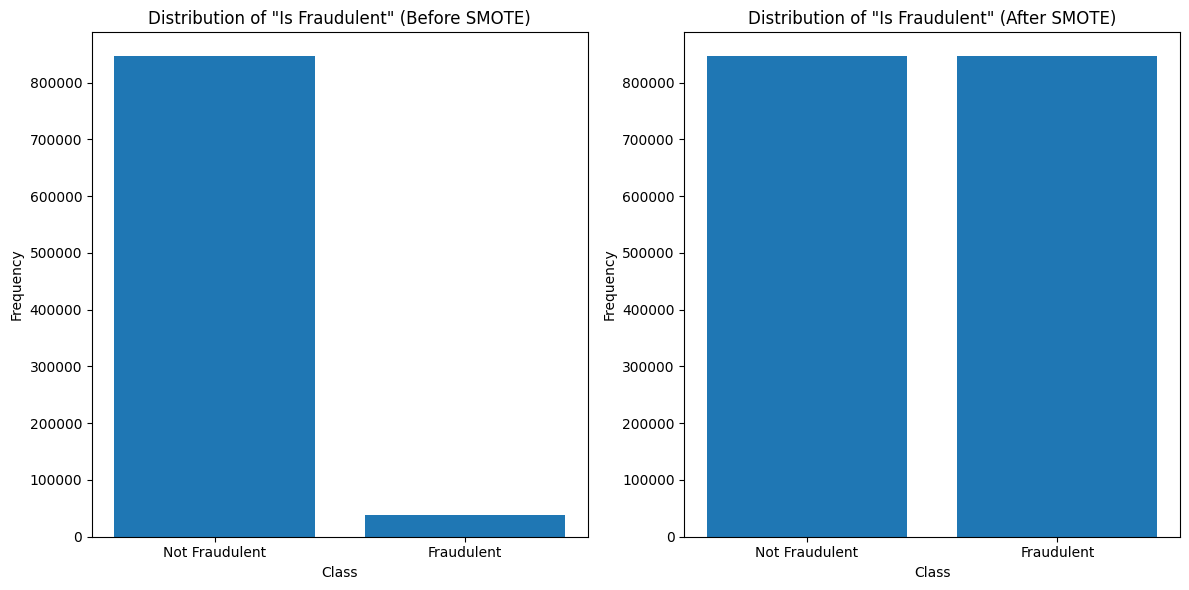

In [8]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the distribution of classes before and after SMOTE
dist_before_smote = Counter(y_train)
dist_after_smote = Counter(y_train_smote)

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Distribution before SMOTE
ax[0].bar(['Not Fraudulent', 'Fraudulent'], dist_before_smote.values())
ax[0].set_title('Distribution of "Is Fraudulent" (Before SMOTE)')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

# Distribution after SMOTE
ax[1].bar(['Not Fraudulent', 'Fraudulent'], dist_after_smote.values())
ax[1].set_title('Distribution of "Is Fraudulent" (After SMOTE)')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [9]:
X_train_smote

,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,...,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday
0,1.082689,-0.706956,0.548484,424,-1.182838,20,37,37,1,0,...,0,0,0,0,1,0,2024,2,7,2
1,1.650006,1.413595,-1.650984,149,1.677128,16,136,136,1,0,...,0,0,1,1,0,0,2024,1,15,0
2,1.447919,0.706745,0.948387,18,-1.276607,17,133,141,0,0,...,1,0,0,0,0,1,2024,3,22,4
3,-0.769095,-0.706956,0.548484,12,-0.057605,16,75,73,0,0,...,0,1,0,0,0,1,2024,2,10,5
4,2.167796,-0.000106,2.548000,7,0.392488,10,34,35,0,0,...,0,1,0,0,1,0,2024,2,25,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692473,0.549130,0.706745,0.450327,175,1.169815,4,83,86,0,0,...,0,0,0,0,0,0,2024,2,6,2
1692474,0.520795,-0.368316,-0.634496,144,-0.767759,8,4,4,0,0,...,0,0,0,0,0,0,2024,1,6,3
1692475,-1.002536,1.413595,-1.770464,353,-1.559728,11,319,319,1,0,...,0,0,1,0,0,0,2024,2,14,4
1692476,-0.078639,-1.410821,0.548484,2,0.140221,7,17,15,0,1,...,0,0,0,1,0,0,2024,2,8,3


In [10]:
y_train_smote

0          0
1          0
2          0
3          0
4          0
          ..
1692473    1
1692474    1
1692475    1
1692476    1
1692477    1
Name: Is Fraudulent, Length: 1692478, dtype: int64

In [11]:
# Combine X and y for training, testing, and validation sets

# Combine training data (X_train_smote and y_train_smote)
train_set = pd.concat([X_train_smote, y_train_smote], axis=1)

# Combine testing data (X_test and y_test)
test_set = pd.concat([X_test, y_test], axis=1)

# Combine validation data (X_val and y_val)
validation_set = pd.concat([X_val, y_val], axis=1)


# Display the first few rows of each combined dataset
print("Training Set (After SMOTE):")
print(train_set.head(), "\n")

print("Test Set:")
print(test_set.head(), "\n")

print("Validation Set:")
print(validation_set.head(), "\n")

# Print sizes of combined datasets
print("Combined Dataset Sizes:")
print(f"Training Set Size (After SMOTE): {train_set.shape[0]} rows, {train_set.shape[1]} columns")
print(f"Test Set Size: {test_set.shape[0]} rows, {test_set.shape[1]} columns")
print(f"Validation Set Size: {validation_set.shape[0]} rows, {validation_set.shape[1]} columns")


Training Set (After SMOTE):
   Transaction Amount  Quantity  Customer Age  Customer Location  \
0            1.082689 -0.706956      0.548484                424   
1            1.650006  1.413595     -1.650984                149   
2            1.447919  0.706745      0.948387                 18   
3           -0.769095 -0.706956      0.548484                 12   
4            2.167796 -0.000106      2.548000                  7   

   Account Age Days  Transaction Hour  Shipping City  Billing City  \
0         -1.182838                20             37            37   
1          1.677128                16            136           136   
2         -1.276607                17            133           141   
3         -0.057605                16             75            73   
4          0.392488                10             34            35   

   Payment Method_PayPal  Payment Method_bank transfer  ...  \
0                      1                             0  ...   
1               

In [12]:
# Set pandas options to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the full train_set DataFrame
train_set


,Transaction Amount,Quantity,Customer Age,Customer Location,Account Age Days,Transaction Hour,Shipping City,Billing City,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet,Transaction Year,Transaction Month,Transaction Day,Transaction Weekday,Is Fraudulent
0,1.082689,-0.706956,0.548484,424,-1.182838,20,37,37,1,0,0,0,0,1,0,0,0,0,1,0,2024,2,7,2,0
1,1.650006,1.413595,-1.650984,149,1.677128,16,136,136,1,0,0,0,0,0,0,0,1,1,0,0,2024,1,15,0,0
2,1.447919,0.706745,0.948387,18,-1.276607,17,133,141,0,0,1,0,0,0,1,0,0,0,0,1,2024,3,22,4,0
3,-0.769095,-0.706956,0.548484,12,-0.057605,16,75,73,0,0,1,0,0,0,0,1,0,0,0,1,2024,2,10,5,0
4,2.167796,-0.000106,2.548000,7,0.392488,10,34,35,0,0,0,1,0,0,0,1,0,0,1,0,2024,2,25,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1692473,0.549130,0.706745,0.450327,175,1.169815,4,83,86,0,0,0,0,0,0,0,0,0,0,0,0,2024,2,6,2,1
1692474,0.520795,-0.368316,-0.634496,144,-0.767759,8,4,4,0,0,1,0,0,0,0,0,0,0,0,0,2024,1,6,3,1
1692475,-1.002536,1.413595,-1.770464,353,-1.559728,11,319,319,1,0,0,0,0,0,0,0,1,0,0,0,2024,2,14,4,1
1692476,-0.078639,-1.410821,0.548484,2,0.140221,7,17,15,0,1,0,0,0,0,0,0,0,1,0,0,2024,2,8,3,1


## use train_set, test_set, validation_set 开始写model

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, precision_recall_curve, auc, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
### Decision Tree
### Random Forest
### AdaBoost
### CatBoost
### XGBoost
### LightGBM

In [2]:
class BaseModelEvaluator:
    """Base class with common evaluation methods"""
    def __init__(self, X_train_smote, X_val, X_test, y_train_smote, y_val, y_test):
        self.X_train_smote = X_train_smote
        self.X_val = X_val
        self.X_test = X_test
        self.y_train_smote = y_train_smote
        self.y_val = y_val
        self.y_test = y_test
        self.model = None
        self.predictions = {}
        self.probabilities = {}
        self.metrics = {}

    def evaluate(self):
        """Calculate metrics for all datasets"""
        datasets = {
            'train': (self.y_train_smote, self.X_train_smote),
            'validation': (self.y_val, self.X_val),
            'test': (self.y_test, self.X_test)
        }
        
        for dataset_name, (y_true, X) in datasets.items():
            y_pred = self.model.predict(X)
            y_prob = self.model.predict_proba(X)[:, 1]
            
            self.predictions[dataset_name] = y_pred
            self.probabilities[dataset_name] = y_prob
            
            self.metrics[dataset_name] = {
                'accuracy': accuracy_score(y_true, y_pred),
                'precision': precision_score(y_true, y_pred),
                'recall': recall_score(y_true, y_pred),
                'f1': f1_score(y_true, y_pred),
                'roc_auc': roc_auc_score(y_true, y_prob),
                'confusion_matrix': confusion_matrix(y_true, y_pred)
            }

    def plot_confusion_matrix(self, dataset='test'):
        """Plot confusion matrix"""
        plt.figure(figsize=(8, 6))
        cm = self.metrics[dataset]['confusion_matrix']
        sns.heatmap(cm, annot=True, fmt='d')
        plt.title(f'{self.__class__.__name__} Confusion Matrix ({dataset})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        return plt

    def plot_roc_curve(self, dataset='test'):
        """Plot ROC curve"""
        plt.figure(figsize=(8, 6))
        y_true = getattr(self, f'y_{dataset}')
        y_prob = self.probabilities[dataset]
        
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{self.__class__.__name__} ROC Curve ({dataset})')
        plt.legend()
        return plt

    def get_metrics_summary(self):
        """Return metrics summary as DataFrame"""
        summary = []
        for dataset, metrics in self.metrics.items():
            metrics_copy = metrics.copy()
            metrics_copy.pop('confusion_matrix')
            metrics_copy['dataset'] = dataset
            summary.append(metrics_copy)
        
        return pd.DataFrame(summary).round(4)

In [3]:
class DecisionTreeModel(BaseModelEvaluator):
    def __init__(self, X_train_smote, X_val, X_test, y_train_smote, y_val, y_test):
        super().__init__(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
        from sklearn.tree import DecisionTreeClassifier
        self.model = DecisionTreeClassifier(random_state=42)
        
    def train(self):
        self.model.fit(self.X_train_smote, self.y_train_smote)
        self.evaluate()

In [ ]:
# Decision Tree
dt_model = DecisionTreeModel(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
dt_model.train()
print("Decision Tree Results:")
print(dt_model.get_metrics_summary())
dt_model.plot_confusion_matrix()
dt_model.plot_roc_curve()

Starting fraud detection model training pipeline...
Analyzing feature importance using training data...


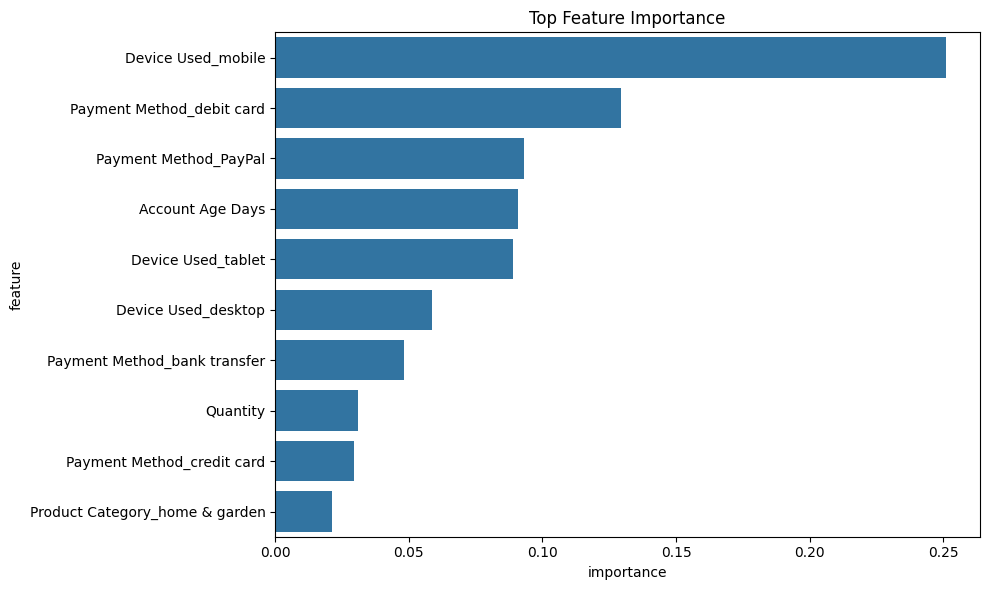


=== TRAINING PHASE ===
Training initial model...

Performance on Training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    846239
           1       1.00      1.00      1.00    846239

    accuracy                           1.00   1692478
   macro avg       1.00      1.00      1.00   1692478
weighted avg       1.00      1.00      1.00   1692478


Initial Training Recall: 1.0000

=== VALIDATION PHASE ===
Tuning parameters using validation set...

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
Best Validation Recall: 0.1516

Performance on Validation set:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97    282080
           1       0.18      0.15      0.16     12530

    accuracy                           0.93    294610
   macro avg       0.57      0.56      0.56    294610
weighted avg       0.93      0.93      0.93    294610


=== TESTING PHASE =

In [53]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Feature Importance Analysis
def analyze_feature_importance(X, y, n_features=10):
    """
    Analyze feature importance using a simple decision tree
    """
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X, y)
    
    # Get feature importance
    importance = pd.DataFrame({
        'feature': X.columns,
        'importance': dt.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance.head(n_features), x='importance', y='feature')
    plt.title('Top Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return importance

def evaluate_model(model, X, y, set_name=""):
    """
    Evaluate model performance with focus on recall
    """
    y_pred = model.predict(X)
    recall = recall_score(y, y_pred)
    print(f"\nPerformance on {set_name} set:")
    print(classification_report(y, y_pred))
    return recall

# Step 2: Training and Initial Evaluation
def train_initial_model(X_train, y_train):
    """
    Train initial model and evaluate on training data
    """
    print("\n=== TRAINING PHASE ===")
    print("Training initial model...")
    
    # Start with a basic model
    initial_model = DecisionTreeClassifier(random_state=42)
    initial_model.fit(X_train, y_train)
    
    # Evaluate on training data
    train_recall = evaluate_model(initial_model, X_train, y_train, "Training")
    
    print(f"\nInitial Training Recall: {train_recall:.4f}")
    return initial_model, train_recall

# Step 3: Validation and Parameter Tuning
def validate_and_tune(X_train, y_train, X_val, y_val):
    """
    Use validation set to tune parameters
    """
    print("\n=== VALIDATION PHASE ===")
    print("Tuning parameters using validation set...")
    
    best_recall = 0
    best_params = {}
    best_model = None
    
    # Parameter grid
    max_depths = [5, 10, 15, 20, None]
    min_samples_splits = [2, 5, 10]
    min_samples_leafs = [1, 2, 4]
    
    for depth in max_depths:
        for min_split in min_samples_splits:
            for min_leaf in min_samples_leafs:
                dt = DecisionTreeClassifier(
                    max_depth=depth,
                    min_samples_split=min_split,
                    min_samples_leaf=min_leaf,
                    random_state=42
                )
                
                # Train on training data
                dt.fit(X_train, y_train)
                
                # Evaluate on validation data
                val_recall = recall_score(y_val, dt.predict(X_val))
                
                if val_recall > best_recall:
                    best_recall = val_recall
                    best_params = {
                        'max_depth': depth,
                        'min_samples_split': min_split,
                        'min_samples_leaf': min_leaf
                    }
                    best_model = dt
    
    print("\nBest Parameters:", best_params)
    print(f"Best Validation Recall: {best_recall:.4f}")
    
    # Detailed evaluation of best model on validation set
    val_recall = evaluate_model(best_model, X_val, y_val, "Validation")
    
    return best_model, best_params, val_recall

# Step 4: Final Testing
def test_final_model(model, X_test, y_test):
    """
    Evaluate final model on test set
    """
    print("\n=== TESTING PHASE ===")
    print("Evaluating final model on test set...")
    
    test_recall = evaluate_model(model, X_test, y_test, "Test")
    return test_recall

# Main execution pipeline
def train_fraud_detection_model(train_set, validation_set, test_set):
    """
    Main pipeline for training and evaluating the fraud detection model
    """
    # Separate features and target
    X_train = train_set.drop('Is Fraudulent', axis=1)
    y_train = train_set['Is Fraudulent']
    X_val = validation_set.drop('Is Fraudulent', axis=1)
    y_val = validation_set['Is Fraudulent']
    X_test = test_set.drop('Is Fraudulent', axis=1)
    y_test = test_set['Is Fraudulent']cc
    
    # 1. Analyze feature importance (using only training data)
    print("Analyzing feature importance using training data...")
    importance = analyze_feature_importance(X_train, y_train)
    
    # 2. Train initial model and evaluate on training data
    initial_model, train_recall = train_initial_model(X_train, y_train)
    
    # 3. Validate and tune parameters
    best_model, best_params, val_recall = validate_and_tune(X_train, y_train, X_val, y_val)
    
    # 4. Final testing
    test_recall = test_final_model(best_model, X_test, y_test)
    
    # Print final summary
    print("\n=== FINAL SUMMARY ===")
    print("Model Performance (Recall):")
    print(f"Training Set: {train_recall:.4f}")
    print(f"Validation Set: {val_recall:.4f}")
    print(f"Test Set: {test_recall:.4f}")
    
    return best_model, best_params

# Execute the pipeline
print("Starting fraud detection model training pipeline...")
best_model, best_params = train_fraud_detection_model(train_set, validation_set, test_set)

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight="balanced")

# Train the model on the SMOTE-enhanced training set
rf_model.fit(X_train, y_train)

# Make predictions on the train, validation, and test sets
train_preds = rf_model.predict(X_train)

# Evaluate the model performance
print("Training Set Performance:")
print(classification_report(y_train, train_preds))
print(confusion_matrix(y_train, train_preds))

Training Set Performance:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95    846239
           1       1.00      0.90      0.95    846239

    accuracy                           0.95   1692478
   macro avg       0.95      0.95      0.95   1692478
weighted avg       0.95      0.95      0.95   1692478

[[846239      0]
 [ 87863 758376]]


In [50]:
class RandomForestModel(BaseModelEvaluator):
    def __init__(self, X_train_smote, X_val, X_test, y_train_smote, y_val, y_test):
        super().__init__(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
        from sklearn.ensemble import RandomForestClassifier
        self.model = RandomForestClassifier(n_estimators=100, random_state=42)
        
    def train(self):
        self.model.fit(self.X_train_smote, self.y_train_smote)
        self.evaluate()

In [ ]:
# Random Forest
rf_model = RandomForestModel(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
rf_model.train()
print("\nRandom Forest Results:")
print(rf_model.get_metrics_summary())
rf_model.plot_confusion_matrix()
rf_model.plot_roc_curve()


=== STEP 1: Baseline Model ===

Classification Report for Baseline (Training) set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    846239
           1       1.00      1.00      1.00    846239

    accuracy                           1.00   1692478
   macro avg       1.00      1.00      1.00   1692478
weighted avg       1.00      1.00      1.00   1692478


=== STEP 2: Model Optimization ===

Top 12 features selected based on importance

Classification Report for Validation set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    282080
           1       0.19      0.07      0.10     12530

    accuracy                           0.95    294610
   macro avg       0.57      0.53      0.54    294610
weighted avg       0.93      0.95      0.94    294610


=== STEP 3: Final Test Evaluation ===

Classification Report for Test set:
              precision    recall  f1-score   support

      

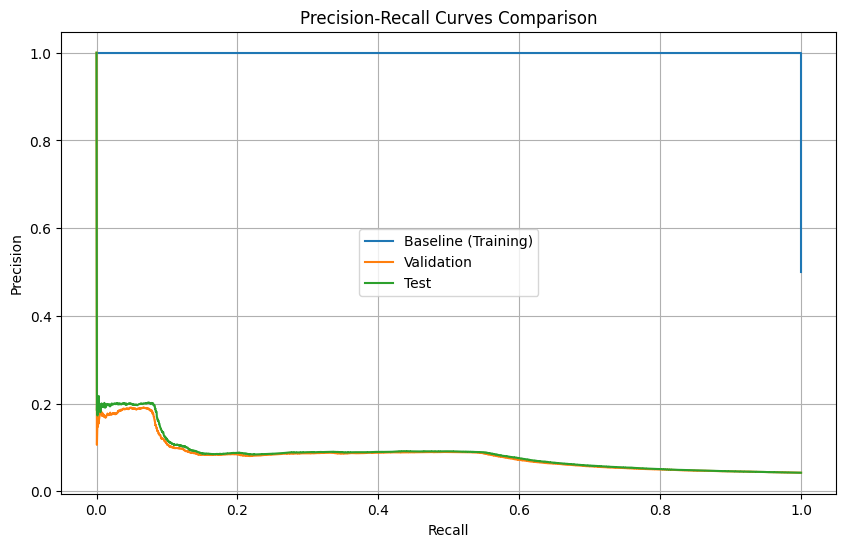


Top 10 Most Important Features:
                             feature  importance
18                Device Used_mobile    0.082970
19                Device Used_tablet    0.082366
17               Device Used_desktop    0.077631
10        Payment Method_credit card    0.069756
11         Payment Method_debit card    0.069453
9       Payment Method_bank transfer    0.068087
8              Payment Method_PayPal    0.067690
4                   Account Age Days    0.062139
14  Product Category_health & beauty    0.048561
16     Product Category_toys & games    0.048044


In [64]:
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings('ignore', category=UndefinedMetricWarning)

def evaluate_model(y_true, y_pred, y_scores, set_name):
    """Evaluate model performance"""
    print(f"\nClassification Report for {set_name} set:")
    print(classification_report(y_true, y_pred, zero_division=0))
    return precision_recall_curve(y_true, y_scores)

def plot_precision_recall_curves(curves_data):
    """Plot precision-recall curves for"""
    plt.figure(figsize=(10, 6))
    for name, (precision, recall, _) in curves_data.items():
        plt.plot(recall, precision, label=f'{name}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

def run_analysis(train_set, validation_set, test_set):
    # Prepare data
    X_train = train_set.drop('Is Fraudulent', axis=1)
    y_train = train_set['Is Fraudulent']
    X_val = validation_set.drop('Is Fraudulent', axis=1)
    y_val = validation_set['Is Fraudulent']
    X_test = test_set.drop('Is Fraudulent', axis=1)
    y_test = test_set['Is Fraudulent']
    
    curves_data = {}  # Store precision-recall curves data
    
    # Step 1: Baseline Model on Training Data
    print("\n=== STEP 1: Baseline Model ===")
    baseline_model = RandomForestClassifier(n_estimators=100, random_state=42)
    baseline_model.fit(X_train, y_train)
    
    # Evaluate baseline model on training data
    # y_pred_train = baseline_model.predict(X_train)
    # y_scores_train = baseline_model.predict_proba(X_train)[:, 1]
    # precision, recall, _ = evaluate_model(y_train, y_pred_train, y_scores_train, "Baseline (Training)")
    # curves_data['Baseline (Training)'] = (precision, recall, _)
    
    # Step 2: Model Optimization using Validation Set
    print("\n=== STEP 2: Model Optimization ===")
    
    # Feature importance based selection
    importances = pd.DataFrame({
        'feature': X_train.columns,
        'importance': baseline_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Select top 80% most important features
    cumsum = importances['importance'].cumsum()
    n_features = len(cumsum[cumsum <= 0.8])
    top_features = importances['feature'].head(n_features).tolist()
    
    print(f"\nTop {n_features} features selected based on importance")
    
    # Train optimized model
    optimized_model = RandomForestClassifier(
        n_estimators=300,
        class_weight='balanced',
        max_depth=15,
        min_samples_leaf=1,
        random_state=42
    )
    
    # Use selected features
    X_train_selected = X_train[top_features]
    X_val_selected = X_val[top_features]
    X_test_selected = X_test[top_features]
    
    optimized_model.fit(X_train_selected, y_train)
    
    # Evaluate on validation set
    y_pred_val = optimized_model.predict(X_val_selected)
    y_scores_val = optimized_model.predict_proba(X_val_selected)[:, 1]
    precision, recall, _ = evaluate_model(y_val, y_pred_val, y_scores_val, "Validation")
    curves_data['Validation'] = (precision, recall, _)
    
    # Step 3: Final Testing
    print("\n=== STEP 3: Final Test Evaluation ===")
    y_pred_test = optimized_model.predict(X_test_selected)
    y_scores_test = optimized_model.predict_proba(X_test_selected)[:, 1]
    precision, recall, _ = evaluate_model(y_test, y_pred_test, y_scores_test, "Test")
    curves_data['Test'] = (precision, recall, _)
    
    # Plot precision-recall curves for all sets
    plot_precision_recall_curves(curves_data)
    
    # Print feature importance summary
    print("\nTop 10 Most Important Features:")
    print(importances.head(10))

# Run the complete analysis
run_analysis(train_set, validation_set, test_set)

In [80]:
from sklearn.ensemble import AdaBoostClassifier

# Step 1: Data Preparation
X_train = train_set.drop(columns='Is Fraudulent')
y_train = train_set['Is Fraudulent']
X_val = validation_set.drop(columns='Is Fraudulent')
y_val = validation_set['Is Fraudulent']
X_test = test_set.drop(columns='Is Fraudulent')
y_test = test_set['Is Fraudulent']

# Step 2: Model Initialization
# Create a weak learner (Decision Tree with limited depth) as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)

# Initialize AdaBoost model with the base estimator
ada_model = AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME', random_state=42)

# Fit the model on the training data
ada_model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = ada_model.predict(X_val)
print("Validation Recall: ", recall_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

Validation Recall:  0.02314445331205108
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    282080
           1       0.28      0.02      0.04     12530

    accuracy                           0.96    294610
   macro avg       0.62      0.51      0.51    294610
weighted avg       0.93      0.96      0.94    294610



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'estimator__max_depth': [3, 5, 7],  # Different depths for the base decision tree
    'n_estimators': [50, 100, 150],           # Number of weak learners
    'learning_rate': [0.5, 1.0, 1.5]          # Learning rate values
}

# Initialize GridSearchCV
random_search = RandomizedSearchCV(ada_model, param_distributions=param_grid, 
                                   n_iter=10, scoring='recall', cv=3, random_state=42, n_jobs=-1)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = random_search.best_params_
best_estimator = random_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Evaluate on the validation set
y_val_pred = best_estimator.predict(X_val)
print("Optimized Validation Recall: ", recall_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Evaluate on the test set
# y_test_pred = best_estimator.predict(X_test)
# print("Optimized Test Recall: ", recall_score(y_test, y_test_pred))
# print(classification_report(y_test, y_test_pred))

In [85]:
# Evaluate on the test set
y_test_pred = best_estimator.predict(X_test)
print("Optimized Test Recall: ", recall_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Optimized Test Recall:  0.04468917085627643
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    282079
           1       0.23      0.04      0.08     12531

    accuracy                           0.95    294610
   macro avg       0.60      0.52      0.53    294610
weighted avg       0.93      0.95      0.94    294610



In [3]:
class XGBoostModel(BaseModelEvaluator):
    def __init__(self, X_train_smote, X_val, X_test, y_train_smote, y_val, y_test):
        super().__init__(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
        from xgboost import XGBClassifier
        self.model = XGBClassifier(random_state=42)
        
    def train(self):
        self.model.fit(self.X_train_smote, self.y_train_smote)
        self.evaluate()


XGBoost Model Results:
   accuracy  precision  recall      f1  roc_auc     dataset
0    0.9769     0.9997  0.9542  0.9764   0.9898       train
1    0.9573     0.4419  0.0121  0.0236   0.7175  validation
2    0.9573     0.4409  0.0110  0.0215   0.7246        test


<module 'matplotlib.pyplot' from '/Users/jiale/miniconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

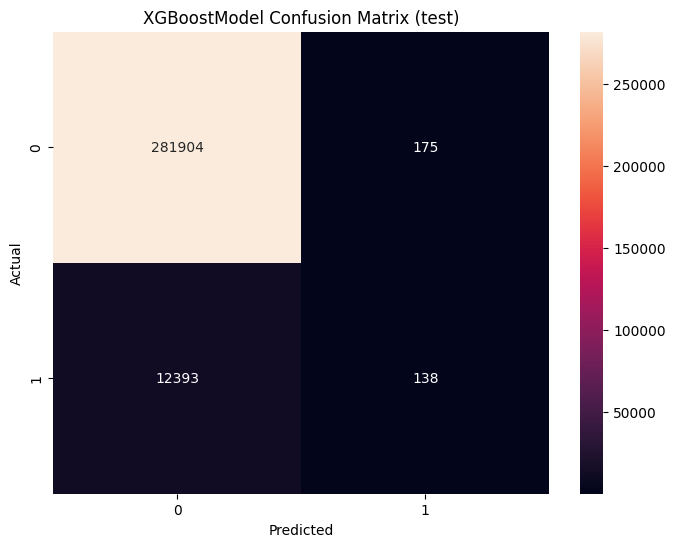

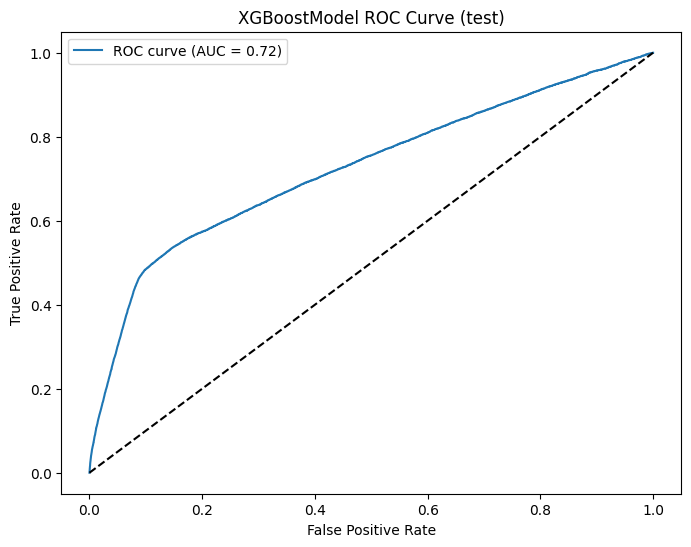

In [13]:
# XGBoost
rf_model = XGBoostModel(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
rf_model.train()
print("\nXGBoost Model Results:")
print(rf_model.get_metrics_summary())
rf_model.plot_confusion_matrix()
rf_model.plot_roc_curve()

In [14]:
class LightGBMModel(BaseModelEvaluator):
    def __init__(self, X_train_smote, X_val, X_test, y_train_smote, y_val, y_test):
        super().__init__(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
        from lightgbm import LGBMClassifier
        self.model = LGBMClassifier(random_state=42)
        
    def train(self):
        self.model.fit(self.X_train_smote, self.y_train_smote)
        self.evaluate()

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 846239, number of negative: 846239
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 1692478, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

LightGBM Model Results:
   accuracy  precision  recall      f1  roc_auc     dataset
0    0.9759     0.9999  0.9518  0.9753   0.9878       train
1    0.9575     0.5312  0.0027  0.0054   0.7227  validation
2    0.9575     0.5660  0.0024  0.0048   0.7258        test


<module 'matplotlib.pyplot' from '/Users/jiale/miniconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

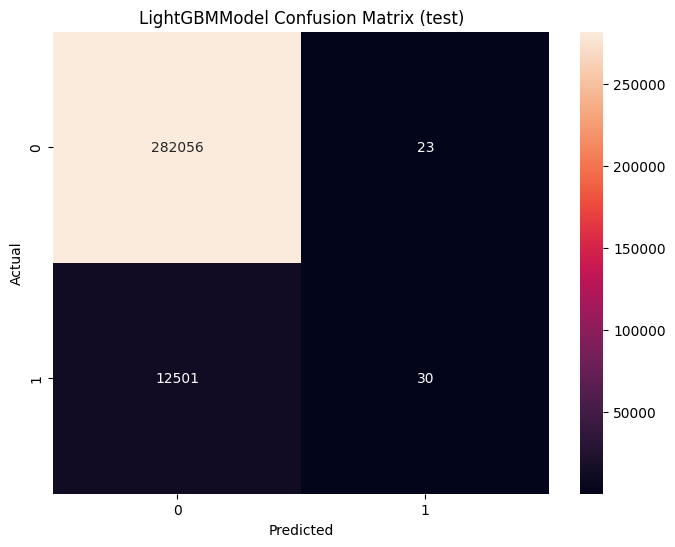

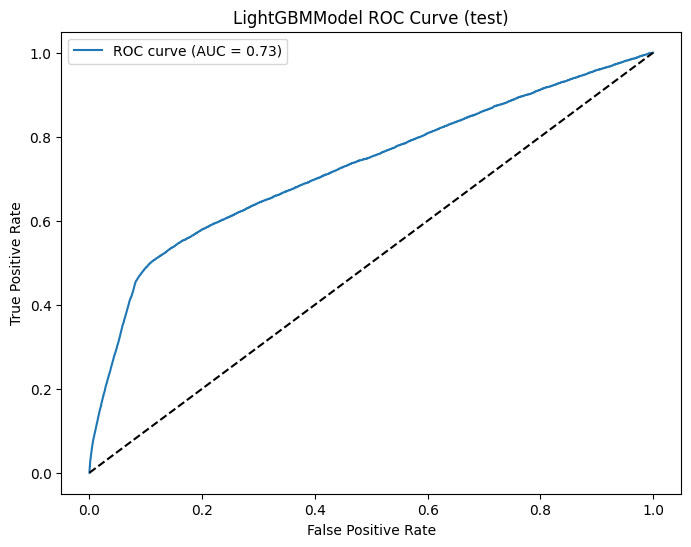

In [15]:
# LightGBM
rf_model = LightGBMModel(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
rf_model.train()
print("\nLightGBM Model Results:")
print(rf_model.get_metrics_summary())
rf_model.plot_confusion_matrix()
rf_model.plot_roc_curve()

In [16]:
class CatBoostModel(BaseModelEvaluator):
    def __init__(self, X_train_smote, X_val, X_test, y_train_smote, y_val, y_test):
        super().__init__(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
        from catboost import CatBoostClassifier
        self.model = CatBoostClassifier(random_state=42, verbose=False)
        
    def train(self):
        self.model.fit(self.X_train_smote, self.y_train_smote)
        self.evaluate()


AdaBoost Model Results:
   accuracy  precision  recall      f1  roc_auc     dataset
0    0.9786     0.9999  0.9574  0.9782   0.9911       train
1    0.9572     0.4019  0.0136  0.0262   0.7151  validation
2    0.9572     0.3848  0.0121  0.0235   0.7175        test


<module 'matplotlib.pyplot' from '/Users/jiale/miniconda3/lib/python3.11/site-packages/matplotlib/pyplot.py'>

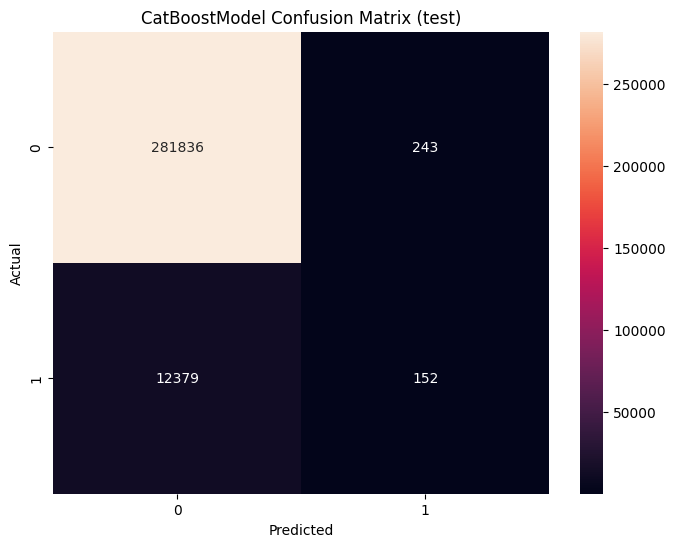

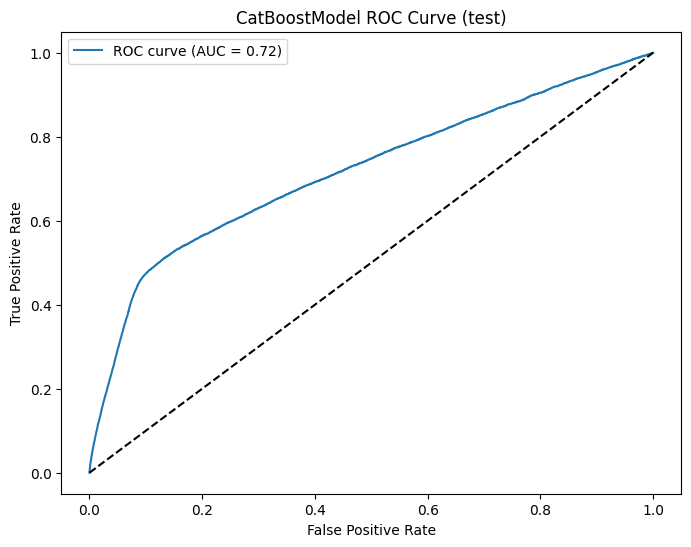

In [17]:
# CatBoost
rf_model = CatBoostModel(X_train_smote, X_val, X_test, y_train_smote, y_val, y_test)
rf_model.train()
print("\nAdaBoost Model Results:")
print(rf_model.get_metrics_summary())
rf_model.plot_confusion_matrix()
rf_model.plot_roc_curve()